# Coffee Roasting Network using Deep Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## DataSet

In [2]:
df=pd.read_csv(r"C:\Users\abdul\Downloads\PROJECTS\ML PROJECTS\Coffee_Roasting\Data\Coffee_Roasting_data.csv")
df.head()

,Temperature,Duration,Output
0,185.317638,12.693965,1.0
1,259.920475,11.867664,0.0
2,231.013571,14.414242,0.0
3,175.366645,11.720587,0.0
4,187.120865,14.129732,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  200 non-null    float64
 1   Duration     200 non-null    float64
 2   Output       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [4]:
df.isnull().sum()

Temperature    0
Duration       0
Output         0
dtype: int64

In [5]:
df.describe()

,Temperature,Duration,Output
count,200.000000,200.000000,200.000000
mean,218.667833,13.430685,0.215000
std,40.061937,1.131249,0.411853
min,151.323722,11.512747,0.000000
25%,184.739493,12.470893,0.000000
50%,220.252393,13.269895,0.000000
75%,252.708620,14.412054,0.000000
max,284.994342,15.454207,1.000000


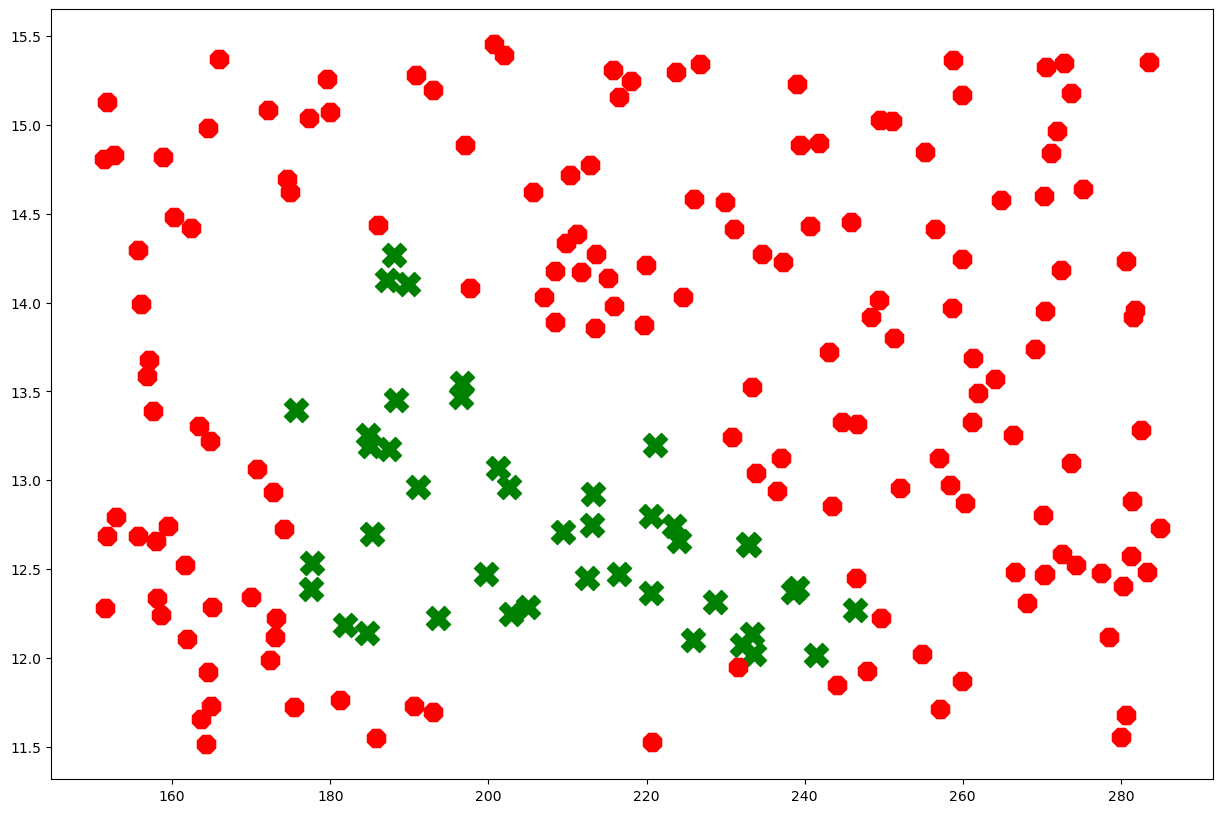

In [6]:
plt.figure(figsize=(15,10))
df1=df[df["Output"]!=0]
df2=df[df["Output"]!=1]
plt.scatter(df1["Temperature"],df1["Duration"],c="g",marker="X",s=300)
plt.scatter(df2["Temperature"],df2["Duration"],c="r",marker="8",s=200)
plt.show()

### Splitting Data

In [7]:
X=df.iloc[:,[0,1]].to_numpy()
Y=df.iloc[:,[2]].to_numpy()
print(X.shape, Y.shape)

(200, 2) (200, 1)


### Normalize Data

In [8]:
import tensorflow as tf

print(f"Temperature Max, Min pre normalization : {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization : 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


Tile/copy our data to increase the training set size and reduce the number of training epochs.

In [9]:
Xt = np.tile(Xn,(1000,1))
Yt= np.tile(Y,(1000,1))   
print(Xt.shape, Yt.shape)   

(200000, 2) (200000, 1)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xt, Yt, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(160000, 2)
(40000, 2)


## Tensorflow Model

### Model
  
Let's build the "Coffee Roasting Network". There are two layers with first with relu activation and second sigmoid activation 

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy

In [12]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='relu', name = 'layer1'),
        Dense(1, activation='sigmoid', name = 'layer2')
     ]
)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [14]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 0.87819636 -0.4870175   0.7157724 ]
 [-0.6560144   0.3709383  -0.573366  ]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[ 1.1147467 ]
 [-0.16877913]
 [-0.9330437 ]] 
b2(1,): [0.]


In [15]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=["Accuracy"])

history = model.fit(X_train,y_train,epochs=5)

Epoch 1/5
5000/5000 [==============================] - 16s 3ms/step - loss: 0.0758 - Accuracy: 0.9717
Epoch 2/5
5000/5000 [==============================] - 15s 3ms/step - loss: 0.0192 - Accuracy: 0.9961
Epoch 3/5
5000/5000 [==============================] - 15s 3ms/step - loss: 0.0126 - Accuracy: 0.9979
Epoch 4/5
5000/5000 [==============================] - 15s 3ms/step - loss: 0.0087 - Accuracy: 0.9992
Epoch 5/5
5000/5000 [==============================] - 15s 3ms/step - loss: 0.0066 - Accuracy: 0.9993


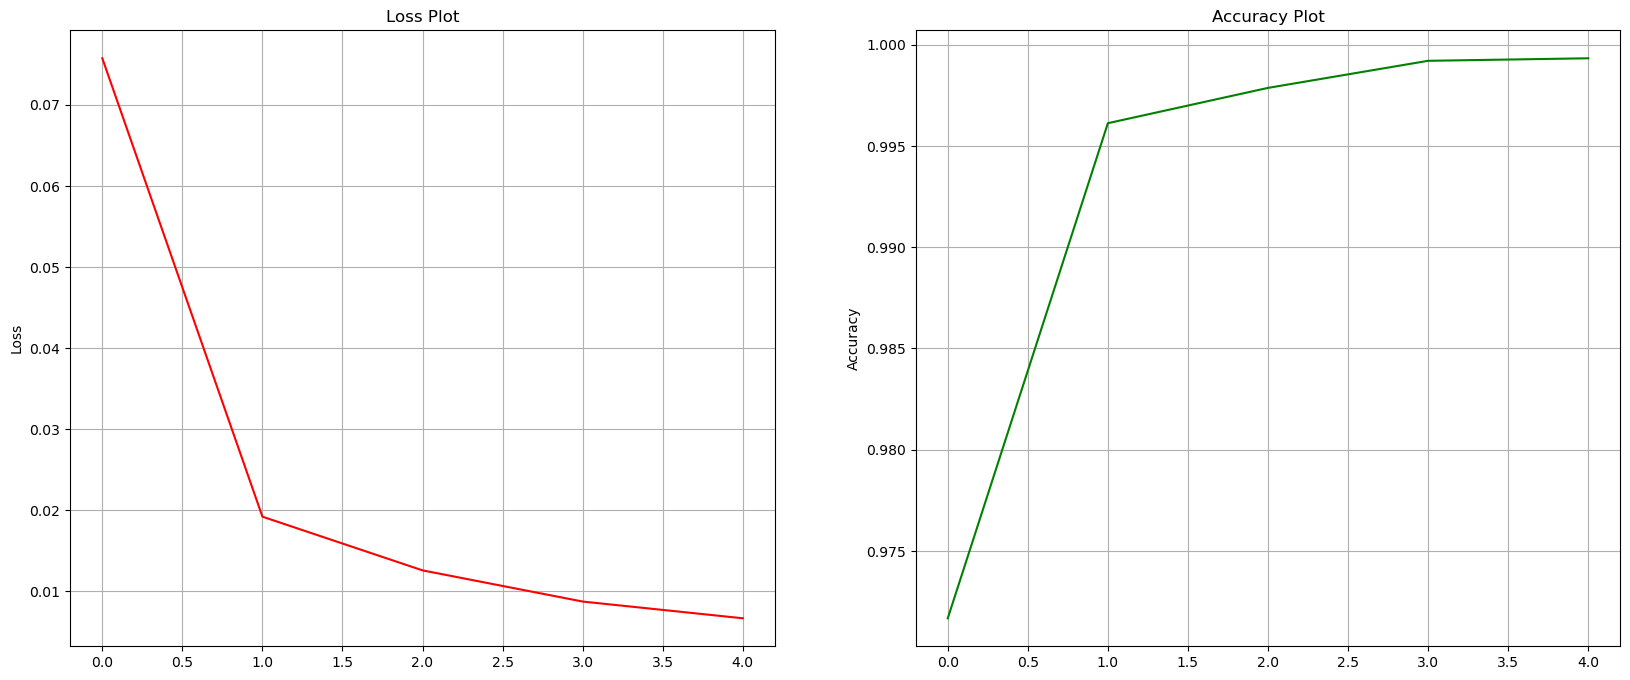

In [16]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(history.history["loss"],color="r")
plt.title("Loss Plot")
plt.ylabel("Loss")
plt.grid()
plt.subplot(1,2,2)
plt.plot(history.history["Accuracy"],color="g")
plt.title("Accuracy Plot")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [17]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:\n", b1)
print("W2:\n", W2, "\nb2:\n", b2)

W1:
 [[ 0.06692994 -7.5315347   7.6927576 ]
 [ 4.9271874   1.1448543   8.208448  ]] 
b1:
 [ 6.765921  -6.298976   3.5470364]
W2:
 [[ 11.49777 ]
 [-30.380749]
 [-25.17519 ]] 
b2:
 [-6.4622326]


### Predictions

In [18]:
X_tes = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_testn = norm_l(X_tes)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

1/1 [==============================] - 0s 256ms/step
predictions = 
 [[0.99994224]
 [0.        ]]


To convert the probabilities to a decision, we apply a threshold:

In [19]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


In [20]:
y_hat_prob = model.predict(X_test)
y_hat = []
threshold=0.5
for i in y_hat_prob:
    if i>threshold:
        y_hat.append(1)
    else:
        y_hat.append(0)


1250/1250 [==============================] - 3s 3ms/step


In [21]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix
def scores(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    pre = precision_score(y_test,y_pred)
    rec = recall_score(y_test,y_pred)
    f1 = accuracy_score(y_test,y_pred)
    con = confusion_matrix(y_test,y_pred)
    print("Accuracy Score  : " ,round(acc*100,2))
    print("Precision Score : " ,round(pre*100,2))
    print("Recall Score    : " ,round(rec*100,2))
    print("F1 Score        : " ,round(f1*100,2))
    print("Confusion Matrix:\n" ,con)
scores(y_test,y_hat)

Accuracy Score  :  100.0
Precision Score :  100.0
Recall Score    :  100.0
F1 Score        :  100.0
Confusion Matrix:
 [[31560     0]
 [    0  8440]]


# Custom Model

In [22]:
import numpy as np

In [23]:
def sigmoid(z):
    yhat=1/(1+np.exp(-(z)))
    return yhat

In [24]:
def Dense_(a,w,b):
    z=(np.dot(a,w)+b)
    yhat=sigmoid(z)
    return yhat

In [25]:
def Sequential_(X,w1,b1,w2,b2):
    a1=Dense_(X,w1,b1)
    a2=Dense_(a1,w2,b2)
    return a2

In [26]:
def my_predict(X, W1, b1, W2, b2):
    m = X.shape[0]
    p = np.zeros((m,1))
    for i in range(m):
        p[i,0] = Sequential_(X[i], W1, b1, W2, b2)
    return(p)

In [27]:
w1, b1 = model.get_layer("layer1").get_weights()
w2, b2 = model.get_layer("layer2").get_weights()

In [28]:
 Sequential_(Xt,w1,b1,w2,b2)

array([[6.7941272e-03],
       [8.1815955e-07],
       [1.7659901e-09],
       ...,
       [1.7028479e-09],
       [2.3580600e-02],
       [1.3977034e-09]], dtype=float32)

In [29]:
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

In [30]:
X_tst = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_tstn = norm_l(X_tst)  # remember to normalize
predictions = my_predict(X_tstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp)
predictions

array([[9.71932288e-01],
       [3.28978626e-08]])

In [31]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


In [32]:
y_hat_prob2 = my_predict(X_test, W1_tmp, b1_tmp, W2_tmp, b2_tmp)
y_hat2 = []
threshold=0.5
for i in y_hat_prob2:
    if i>threshold:
        y_hat2.append(1)
    else:
        y_hat2.append(0)


In [33]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix
def scores(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    pre = precision_score(y_test,y_pred)
    rec = recall_score(y_test,y_pred)
    f1 = accuracy_score(y_test,y_pred)
    con = confusion_matrix(y_test,y_pred)
    print("Accuracy Score  : " ,round(acc*100,2))
    print("Precision Score : " ,round(pre*100,2))
    print("Recall Score    : " ,round(rec*100,2))
    print("F1 Score        : " ,round(f1*100,2))
    print("Confusion Matrix:\n" ,con)
scores(y_test,y_hat2)

Accuracy Score  :  100.0
Precision Score :  100.0
Recall Score    :  100.0
F1 Score        :  100.0
Confusion Matrix:
 [[31560     0]
 [    0  8440]]


The End ...